# Dependencies and imports

For how to use nibabel watch from 1:14:04- https://www.youtube.com/watch?v=Y6ulmOlW1FI&t=4718s \
CNN for cortical surface segmentation (not our goal but good explaination)- https://www.youtube.com/watch?v=2KHYIrL7Lyo \
Label key- https://alivelearn.net/?p=175

In [1]:
# # Download programs to computer for working with the data

# !pip install nilearn
# !pip install nibabel

In [2]:
import nibabel as nb
import numpy as np
import numpy.linalg as npl
import nilearn
from nilearn import plotting
import nibabel.freesurfer as nbf
from nibabel.affines import apply_affine

/Users/DrV/.pyenv/versions/3.8.6/envs/mri_personality/lib/python3.8/site-packages/nilearn/datasets/__init__.py:86: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [3]:
# Participant surface, curve, thickness, volume data
free_path = '/Users/DrV/Downloads/freesurfer/sub-0001/mri/'
!ls /Users/DrV/Downloads/freesurfer/sub-0001/mri

T1.mgz                                  mri_nu_correct.mni.log.bak
aparc+aseg.mgz                          norm.mgz
aparc.DKTatlas+aseg.mgz                 nu.mgz
aparc.a2009s+aseg.mgz                   orig
aseg.auto.mgz                           orig.mgz
aseg.auto_noCCseg.label_intensities.txt orig_nu.mgz
aseg.auto_noCCseg.mgz                   rawavg.mgz
aseg.mgz                                rh.ribbon.mgz
aseg.presurf.hypos.mgz                  ribbon.mgz
aseg.presurf.mgz                        segment.dat
brain.finalsurfs.mgz                    talairach.label_intensities.txt
brain.mgz                               talairach.log
brainmask.auto.mgz                      transforms
brainmask.mgz                           wm.asegedit.mgz
ctrl_pts.mgz                            wm.mgz
filled.mgz                              wm.seg.mgz
lh.ribbon.mgz                           wmparc.mgz
mri_nu_correct.mni.log


In [4]:
brain_path = free_path+'brain.mgz'

In [5]:
MGH = nb.load(brain_path)
MGH.affine

array([[-1.00000012e+00, -3.72529030e-09,  6.98491931e-10,
         1.28178513e+02],
       [-4.65661287e-10,  0.00000000e+00,  1.00000012e+00,
        -1.09398438e+02],
       [ 1.86264515e-09, -1.00000012e+00,  7.45058060e-09,
         1.48316666e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [6]:
M = MGH.affine[:3, :3]
abc = MGH.affine[:3, 3]
print(M)
abc

[[-1.00000012e+00 -3.72529030e-09  6.98491931e-10]
 [-4.65661287e-10  0.00000000e+00  1.00000012e+00]
 [ 1.86264515e-09 -1.00000012e+00  7.45058060e-09]]


array([ 128.17851257, -109.3984375 ,  148.31666565])

In [7]:
# Affine transform from the orig volume to the MNI305 atlas

tak_affine = np.array([[1.206490, -0.003920, 0.038221, 0.605286],
[-0.024884, 1.097171, 0.402224, -35.656673],
[-0.010382, -0.337783, 1.100081, 0.913574],
[0,0,0,1]])
tak_affine

array([[ 1.2064900e+00, -3.9200000e-03,  3.8221000e-02,  6.0528600e-01],
       [-2.4884000e-02,  1.0971710e+00,  4.0222400e-01, -3.5656673e+01],
       [-1.0382000e-02, -3.3778300e-01,  1.1000810e+00,  9.1357400e-01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [9]:
MGH_trans = MGH.affine.dot(tak_affine)
MGH_trans

array([[-1.20649014e+00,  3.91999614e-03, -3.82210053e-02,
         1.27573227e+02],
       [-1.03820018e-02, -3.37783040e-01,  1.10008113e+00,
        -1.08484863e+02],
       [ 2.48840051e-02, -1.09717113e+00, -4.02224040e-01,
         1.83973343e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [10]:
MGH.get_fdata()[0]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

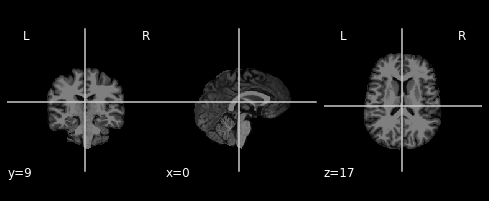

In [118]:
nilearn.plotting.plot_anat(MGH1)

<OrthoSlicer3D: /Users/DrV/Downloads/002/brain.mgz (256, 256, 256)>

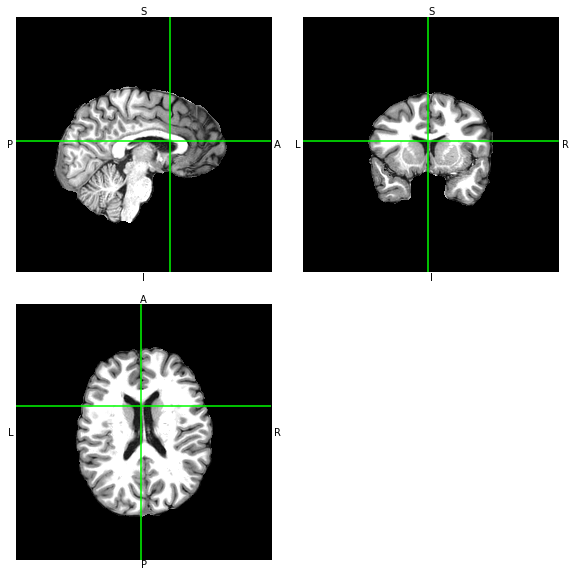

In [125]:
MGH2.orthoview()

<OrthoSlicer3D: /Users/DrV/Downloads/003/brain.mgz (256, 256, 256)>

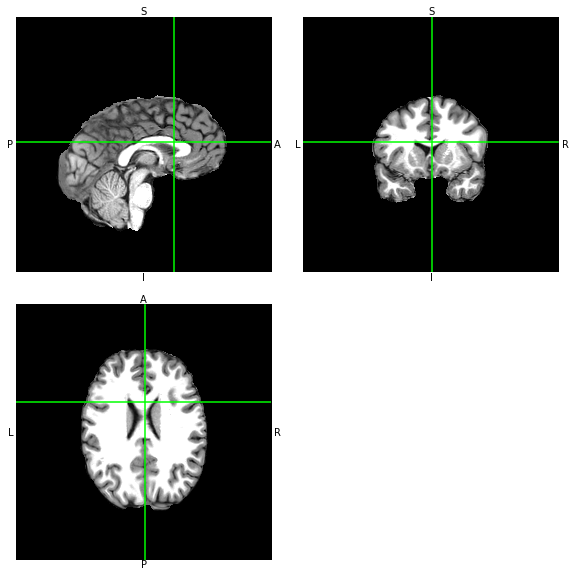

In [122]:
MGH3.orthoview()

<OrthoSlicer3D: (256, 256, 256)>

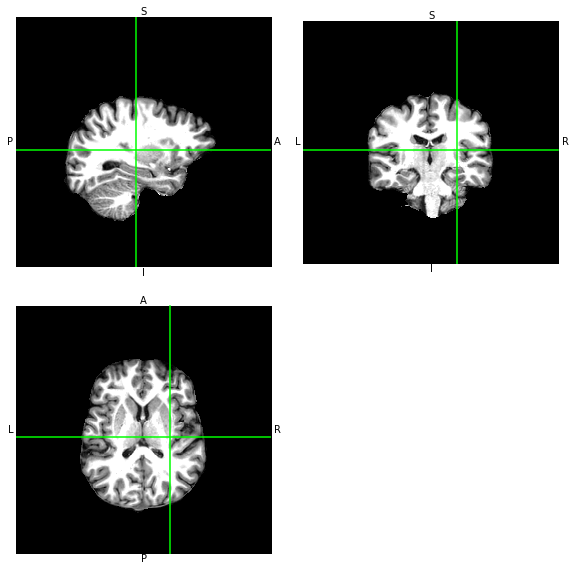

In [123]:
nb.freesurfer.MGHImage(MGH1.dataobj, np.dot(MGH1.affine, lin_trans_1)).orthoview()

<OrthoSlicer3D: (256, 256, 256)>

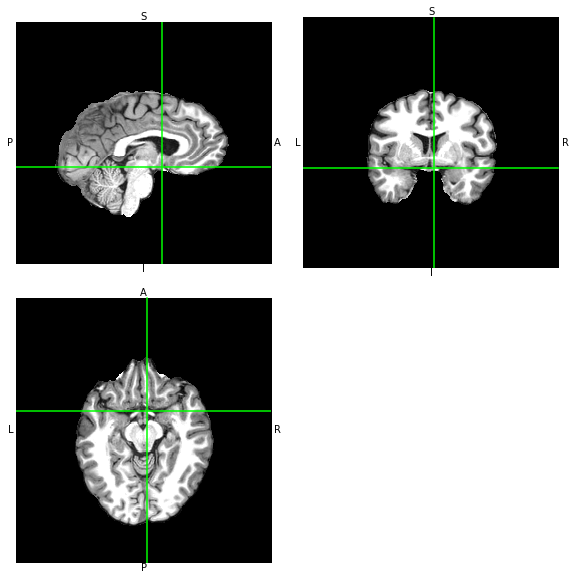

In [121]:
nb.freesurfer.MGHImage(MGH2.dataobj, np.dot(MGH2.affine, lin_trans_2)).orthoview()

<OrthoSlicer3D: (256, 256, 256)>

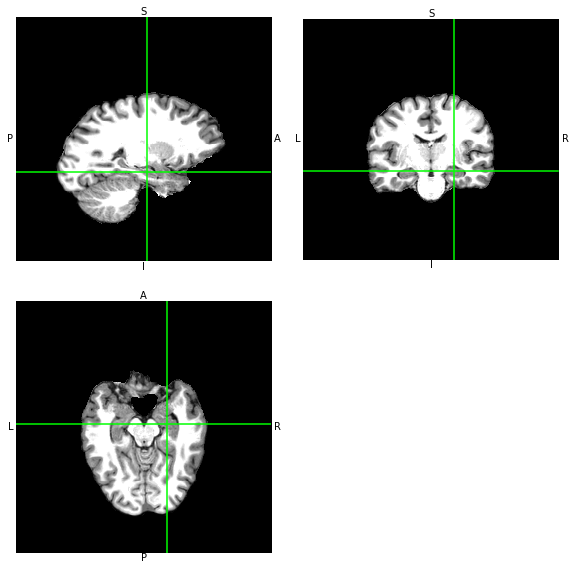

In [124]:
nb.freesurfer.MGHImage(MGH3.dataobj, np.dot(MGH3.affine, lin_trans_3)).orthoview()

Testing with several brains

In [18]:
brain_path_001 = '/Users/DrV/Downloads/001/brain.mgz'
brain_path_002 = '/Users/DrV/Downloads/002/brain.mgz'
brain_path_003 = '/Users/DrV/Downloads/003/brain.mgz'

In [19]:
MGH1 = nb.load(brain_path_001)
MGH2 = nb.load(brain_path_002)
MGH3 = nb.load(brain_path_003)

In [33]:
# The three by three onthe left is the matrix (should look like identity) the right col is the transformation

lin_trans_1 = np.array([[1.206490, -0.003920, 0.038221, 0.605286],
[-0.024884, 1.097171, 0.402224, -35.656673],
[-0.010382, -0.337783, 1.100081, 0.913574],
[0,0,0,1]])

In [34]:
lin_trans_2 = np.array([[1.040158, 0.058057, -0.029809, -2.911911],
[-0.054634, 1.003953, 0.229075, -21.351997],
[0.006857, -0.186948, 1.056232, -11.919769],
[0,0,0,1]])

In [35]:
lin_trans_3 = np.array([[1.165339, 0.036947, -0.002664, 0.496033],
[-0.010810, 1.053055, 0.271329, -22.980499],
[-0.019831, -0.312962, 1.116982, -11.448257],
[0,0,0,1]])

In [36]:
MGH_trans_1 = MGH1.affine.dot(lin_trans_1)
MGH_trans_2 = MGH2.affine.dot(lin_trans_2)
MGH_trans_3 = MGH3.affine.dot(lin_trans_3)

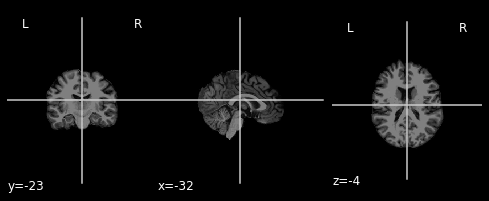

In [99]:
nilearn.plotting.plot_anat(nb.freesurfer.MGHImage(MGH1.dataobj, np.dot(MGH1.affine, lin_trans_1)))

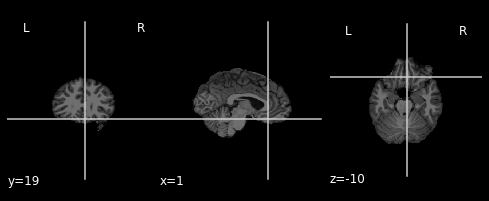

In [98]:
nilearn.plotting.plot_anat(nb.freesurfer.MGHImage(MGH2.dataobj, np.dot(MGH2.affine, lin_trans_2)))

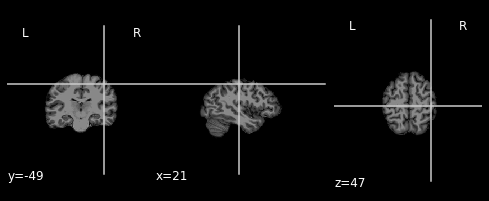

In [97]:
nilearn.plotting.plot_anat(nb.freesurfer.MGHImage(MGH3.dataobj, np.dot(MGH3.affine, lin_trans_3)))

<OrthoSlicer3D: /Users/DrV/Downloads/001/brain.mgz (256, 256, 256)>

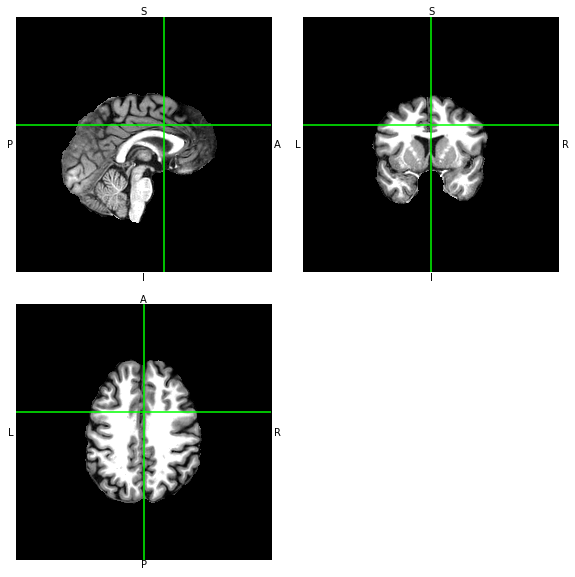

In [38]:
MGH1.orthoview()

<OrthoSlicer3D: /Users/DrV/Downloads/002/brain.mgz (256, 256, 256)>

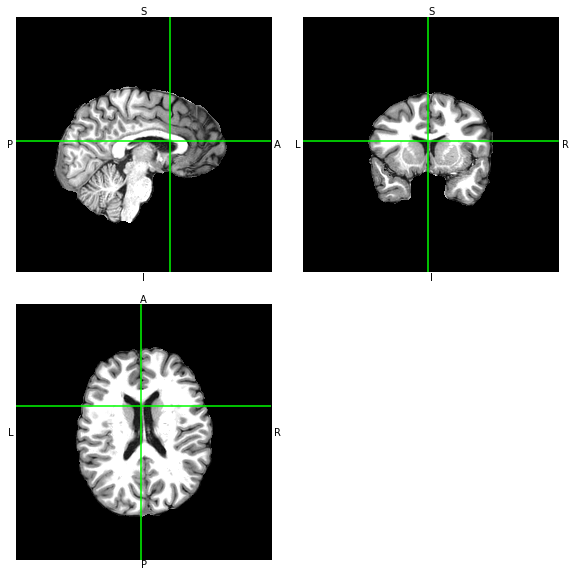

In [39]:
MGH2.orthoview()

In [42]:
lin_trans_3_no = np.array([[ 1.1653390e+00,  3.6947000e-02, -2.6640000e-03,  4.9603300e-01],
       [-1.0810000e-02,  1.0530550e+00,  2.7132900e-01, -2.2980499e+01],
       [-1.9831000e-02, -3.1296200e-01,  1.1169820e+00, -1.1448257e+01]])

In [80]:
MGH3.affine

array([[-1.00000000e+00,  0.00000000e+00, -5.35510480e-09,
         1.27390877e+02],
       [-2.32830644e-09,  7.45058060e-09,  1.00000012e+00,
        -1.25928238e+02],
       [ 1.86264515e-09, -1.00000000e+00, -7.45058060e-09,
         1.58098648e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [76]:
lin_trans_3

array([[ 1.1653390e+00,  3.6947000e-02, -2.6640000e-03,  4.9603300e-01],
       [-1.0810000e-02,  1.0530550e+00,  2.7132900e-01, -2.2980499e+01],
       [-1.9831000e-02, -3.1296200e-01,  1.1169820e+00, -1.1448257e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [82]:
MGH3.dataobj

<OrthoSlicer3D: (256, 256, 256)>

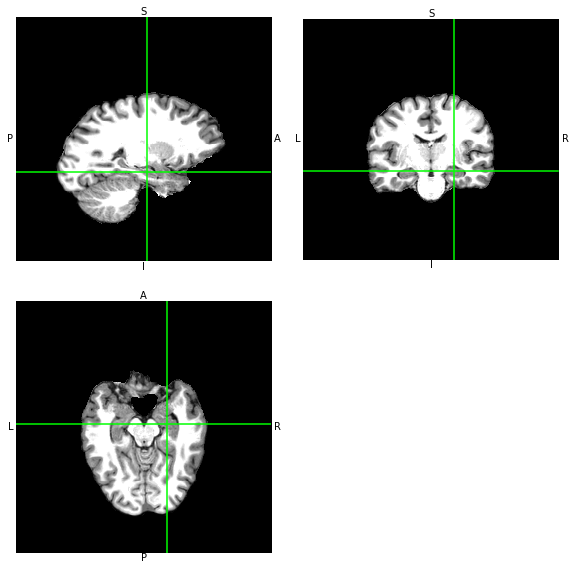

In [96]:
nb.freesurfer.MGHImage(MGH3.dataobj, np.dot(MGH3.affine, lin_trans_3)).orthoview()

<OrthoSlicer3D: (256, 256, 256)>

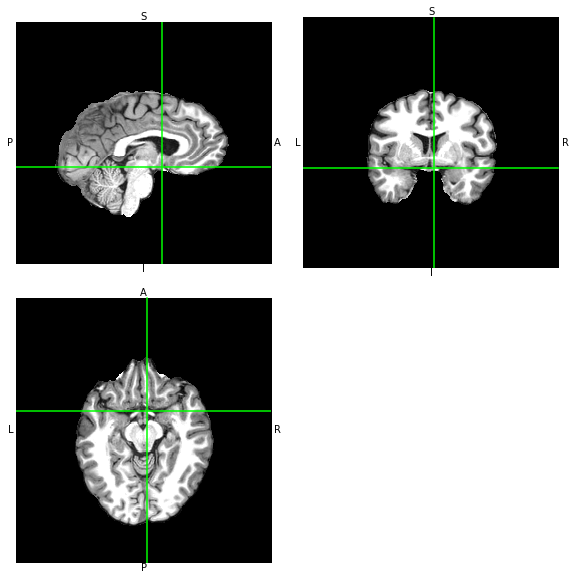

In [100]:
nb.freesurfer.MGHImage(MGH2.dataobj, np.dot(MGH2.affine, lin_trans_2)).orthoview()

<OrthoSlicer3D: (256, 256, 256)>

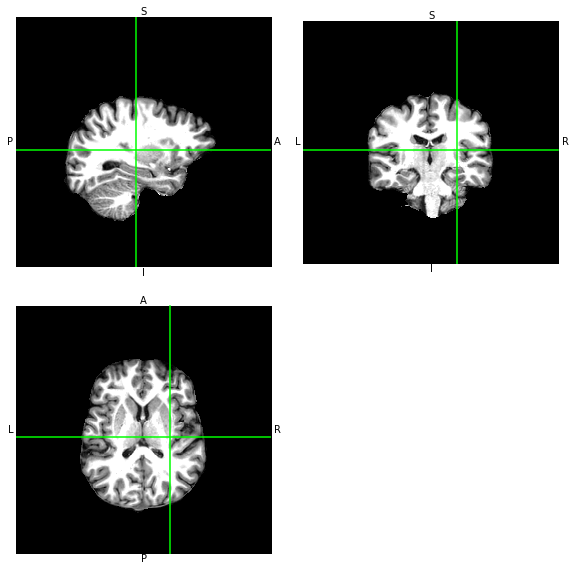

In [101]:
nb.freesurfer.MGHImage(MGH1.dataobj, np.dot(MGH1.affine, lin_trans_1)).orthoview()

In [92]:
lin_trans_test = nb.affines.from_matvec(lin_trans_3_no)

In [90]:
lin_trans_3

array([[ 1.1653390e+00,  3.6947000e-02, -2.6640000e-03,  4.9603300e-01],
       [-1.0810000e-02,  1.0530550e+00,  2.7132900e-01, -2.2980499e+01],
       [-1.9831000e-02, -3.1296200e-01,  1.1169820e+00, -1.1448257e+01],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  1.0000000e+00]])

In [94]:
lin_trans_test

array([[ 1.1653390e+00,  3.6947000e-02, -2.6640000e-03,  4.9603300e-01,
         0.0000000e+00],
       [-1.0810000e-02,  1.0530550e+00,  2.7132900e-01, -2.2980499e+01,
         0.0000000e+00],
       [-1.9831000e-02, -3.1296200e-01,  1.1169820e+00, -1.1448257e+01,
         0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         1.0000000e+00]])

In [95]:
np.dot(MGH3.affine, lin_trans_3)

array([[-1.16533900e+00, -3.69469983e-02,  2.66399402e-03,
         1.26894844e+02],
       [-1.98310052e-02, -3.12962030e-01,  1.11698214e+00,
        -1.37376496e+02],
       [ 1.08100023e-02, -1.05305500e+00, -2.71329008e-01,
         1.81079147e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [105]:
nb.MGHImage(MGH1.dataobj, np.dot(MGH1.affine, lin_trans_1)).get_fdata()

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

<OrthoSlicer3D: (256, 256, 256)>

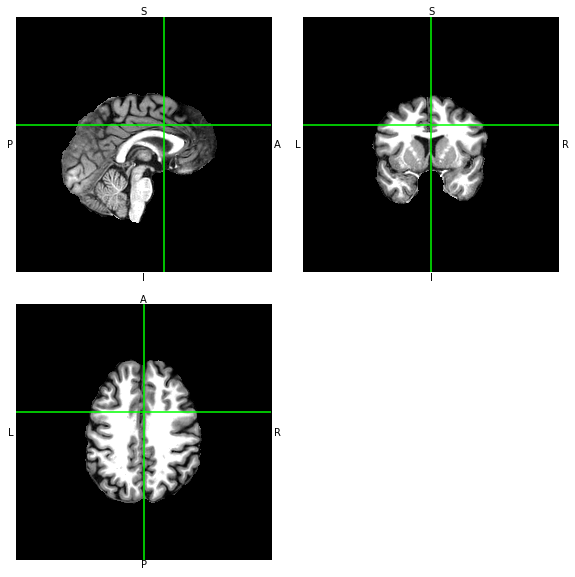

In [132]:
nilearn.image.resample_img(MGH).orthoview()